In [34]:
import pandas as pd
#url = 'https://top500.org/lists/top500/2025/06/download/TOP500_202506_all.xml'
#resp = requests.get(url)
#resp.raise_for_status()
#df = pd.read_xml(resp.content)

xls = "./excels/TOP500_2025_06.xlsx"
xls = "./excels/TOP500_2021_11.xlsx"  # last NV being #1
xls = "./excels/TOP500_2015_11.xlsx"

df = pd.read_excel(xls)
print(df.columns.tolist())

df[:10]['Accelerator/Co-Processor']

['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name', 'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment', 'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax', 'Rpeak', 'Nmax', 'Nhalf', 'Power', 'Mflops/Watt', 'Architecture', 'Processor', 'Processor Technology', 'Processor Speed (MHz)', 'Operating System', 'OS Family', 'Accelerator/Co-Processor', 'Cores per Socket', 'Processor Generation', 'System Model', 'System Family', 'Interconnect Family', 'Interconnect', 'Region', 'Continent']


0    Intel Xeon Phi 31S1P
1       NVIDIA Tesla K20x
2                     NaN
3                     NaN
4                     NaN
5                     NaN
6       NVIDIA Tesla K20x
7                     NaN
8                     NaN
9    Intel Xeon Phi SE10P
Name: Accelerator/Co-Processor, dtype: object

['AMD VEGA 20', 'DEEP COMPUT', 'INTEL XEON ', 'MATRIX-2000', 'NAN', 'NVIDIA 2050', 'NVIDIA A100', 'NVIDIA TESL', 'NVIDIA VOLT', 'PEZY-SC3', 'PREFERRED N']
Label → Color mapping:
AMD VEGA 20
DEEP COMPUT
INTEL XEON 
MATRIX-2000
NAN
NVIDIA 2050
NVIDIA A100
NVIDIA TESL
NVIDIA VOLT
PEZY-SC3
PREFERRED N


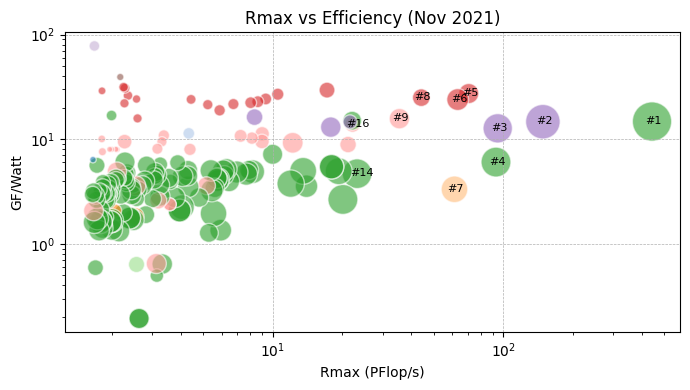

In [19]:
import numpy as np
import matplotlib.pyplot as plt

kRmax = 'Rmax [TFlop/s]'
kEff = 'Power Efficiency [GFlops/Watts]'
#kEff = 'Energy Efficiency [GFlops/Watts]'

#max_rank = df["Rank"].max()
#size = 9*np.exp(4*(max_rank - df["Rank"] + 1)/max_rank) 
max_nmax = df['Nmax'].max()
size = (800*df['Nmax']/max_nmax) 
kk=11
unique_labels = sorted(df["Accelerator/Co-Processor"].astype(str).str.upper().str[:kk].unique())
colors = plt.cm.tab20(range(len(unique_labels)))
label_to_color = {label: colors[i] for i, label in enumerate(unique_labels)}
all_color = [ label_to_color[l] for l in df["Accelerator/Co-Processor"].astype(str).str.upper().str[:kk] ]
print(unique_labels)

plt.figure(figsize=(7,4))
plt.scatter(df[kRmax]/1e3, df[kEff], s=size, c=all_color,  alpha=0.6, edgecolors='w')  #cmap="viridis_r", 
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Rmax (PFlop/s)')
plt.ylabel('GF/Watt')
plt.title('Rmax vs Efficiency (Nov 2021)')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

for i, row in df.iterrows():
    if row["Rank"] <= 16:
        plt.annotate(f"#{row['Rank']}", (row[kRmax]/1e3, row[kEff]),
            xytext=(-5,-2), textcoords="offset points", fontsize=8 )
plt.tight_layout()
plt.savefig("pf_per_watt.png", dpi=300, bbox_inches='tight')

##
# Helper: convert matplotlib RGBA to 24-bit ANSI escape sequence
def rgba_to_bold_ansi(rgba, text):
    r, g, b, _ = [int(255 * c) for c in rgba]
    return f"\033[1m\033[38;2;{r};{g};{b}m{text}\033[0m"

# Print labels in their assigned colors
print("Label → Color mapping:")
for label, color in label_to_color.items():
    print(rgba_to_bold_ansi(color, label))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

max_rank = df["rank"].max()
size = 10*np.exp(5*(max_rank - df["rank"] + 1)/max_rank) 

plt.figure(figsize=(10,6))
plt.scatter(df['r-max'], df['power'], s=size, c=df["rank"], cmap="viridis_r",  alpha=0.6, edgecolors='w')
plt.xscale('log'); plt.yscale('log')
plt.xlabel('Rmax (PFlop/s)')
plt.ylabel('Power (kW)')
plt.title('TOP500: Rmax vs Power (June 2025)')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

for i, row in df.iterrows():
    if row["rank"] <= 20:
        plt.annotate(f"#{row['rank']}", (row["r-max"], row["power"]),
            xytext=(-5,-2), textcoords="offset points", fontsize=8 )
plt.show()


0                       NaN
1        NVIDIA Volta GV100
2        NVIDIA Volta GV100
3                       NaN
4    NVIDIA A100 SXM4 40 GB
5               NVIDIA A100
6               Matrix-2000
7               NVIDIA A100
8         NVIDIA Tesla V100
9         NVIDIA A100 80GB​
Name: Accelerator/Co-Processor, dtype: object